## NLP EDA On Tweets dataset from Kaggle

In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk

In [22]:
# Get the Tweeter dataset
file_loc = "Tweets.csv"
df = pd.read_csv(file_loc)
# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [23]:
# Column ['text'] contains the tweets
print(np.random.choice(df['text'], 3)) #3 random tweets

['@AmericanAir ...have you seen Blue? Go look it up :)'
 "@united I unfortunately didn't get her name :( she was not nice!"
 '@JetBlue not cool. At the gate, turns out my flight from FLL to JAX is delayed, yet app says on time. Not a good start.']


#### Word Tokenization

In [24]:
# Word tokenization in a naive way
df.loc[:3 ,'text'].str.replace('@','').str.lower().str.split(' ') # split, remove '@', put everything in lowercase

0                                                                                                             [virginamerica, what, dhepburn, said.]
1                                                                  [virginamerica, plus, you've, added, commercials, to, the, experience..., tacky.]
2                                                                [virginamerica, i, didn't, today..., must, mean, i, need, to, take, another, trip!]
3    [virginamerica, it's, really, aggressive, to, blast, obnoxious, "entertainment", in, your, guests', faces, &amp;, they, have, little, recourse]
Name: text, dtype: object

In [25]:
# NLTK fuction for word_tokenize
for each in df.loc[:3,'text'].str.lower():
    print(nltk.word_tokenize(each))

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']
['@', 'virginamerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']
['@', 'virginamerica', 'i', 'did', "n't", 'today', '...', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip', '!']
['@', 'virginamerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']


In [26]:
# Add tokenized data into a list 
tokenized_data = []
for each in df.loc[:3,'text'].str.lower():
    tokenized_data.append(nltk.word_tokenize(each))
print(tokenized_data)

[['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.'], ['@', 'virginamerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.'], ['@', 'virginamerica', 'i', 'did', "n't", 'today', '...', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip', '!'], ['@', 'virginamerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']]


In [27]:
# Let's fetch the English language stopwords
from nltk.corpus import stopwords
sw_list = set(stopwords.words('english'))
print(sw_list) # Print inbuild stopwords
sw_list.update(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s"]) # Add few more to the set
print(sw_list) # Print the updated stopwords set

{'haven', 'its', 'against', 'more', 'ain', 'ours', 'and', 'for', "hasn't", 'if', 'of', 'few', "should've", 'didn', 'themselves', 'same', 'wasn', 'we', 'any', 'shan', 're', 'll', 'his', 'they', 'mightn', 'not', 'only', "needn't", 'down', 'do', "weren't", 'don', 'than', "haven't", 'mustn', 'myself', 'is', 'too', "shan't", "wouldn't", 'yourself', "don't", 'are', 'both', 'nor', "it's", 'itself', 'there', "didn't", 'in', 'as', 'to', 'which', 'am', 'our', 'with', 'needn', "you'd", 'under', 'that', 'such', 'those', 'why', 'off', 'o', 'below', 'very', 'or', "you've", 'the', 'm', "won't", "she's", 'how', 'be', 'just', 'won', 'a', 'your', 'an', 'ma', 'isn', "shouldn't", 'while', 'theirs', 'each', 'hasn', 'hadn', 'it', 'most', "doesn't", 'being', 'were', 'aren', 'before', 'during', 'once', 'her', 'now', 'about', 'this', "mightn't", 'i', 'my', 'me', 'been', "you'll", 'have', 'after', 'so', 'because', 'him', 'was', 'over', 'again', "hadn't", 'ourselves', "you're", 'their', 'yourselves', 'all', "isn

In [28]:
# Apply stopwords to the tokenized list
data = []
for line in tokenized_data:
    processed_line = []
    for word in line:
        if word not in sw_list:
            processed_line.append(word)
    data.append(processed_line)
print(data)

[['virginamerica', 'dhepburn', 'said'], ['virginamerica', 'plus', 'added', 'commercials', 'experience', 'tacky'], ['virginamerica', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip'], ['virginamerica', 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guests', 'faces', '&', 'amp', ';', 'little', 'recourse']]


#### Sentence Tokenization

In [29]:
# Sentence tokenization in a naive way
df.loc[:3 ,'text'].str.replace('@','').str.lower().str.split('.') # split with '.' remove '@', put everything in lowercase

0                                                                                               [virginamerica what dhepburn said, ]
1                                                      [virginamerica plus you've added commercials to the experience, , ,  tacky, ]
2                                                        [virginamerica i didn't today, , ,  must mean i need to take another trip!]
3    [virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse]
Name: text, dtype: object

In [30]:
# NLTK fuction sent_tokenize 
for each in df.loc[:3,'text'].str.lower():
    print(nltk.sent_tokenize(each))

['@virginamerica what @dhepburn said.']
["@virginamerica plus you've added commercials to the experience... tacky."]
["@virginamerica i didn't today... must mean i need to take another trip!"]
['@virginamerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse']


#### Stemming and Lemmatization
Reduce words to their root, which is the core part of a word. Take note that the core part ('root') may not be a complete English word.

For example, the words “helping” and “helped” share the root “help.”

> There are two stemmers available in NLTK, PorterStemmer() and SnowballStemmer(). The Snowball stemmer, which is also called Porter2, is an improvement on the original Porter stemmer.

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.

> For instance, stemming the word 'amazed' would return 'amaz'. However, lemmatizing the word 'amazed' would give 'amaze'.

In [31]:
from nltk.stem import PorterStemmer
p_stemmer = PorterStemmer()
from nltk.stem import SnowballStemmer
s_stemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
# Lets do word tokenized of 5 rows and add it in a list 
tokenized_data = []
for each in df.loc[:5,'text'].str.lower():
    tokenized_data.append(nltk.word_tokenize(each))

In [33]:
# Apply both types of Stemming
original_words_list = []
p_stemmed_list = []
s_stemmed_list = []
lemmatize_list = []
for each_list in tokenized_data:
    for word in each_list:
        original_words_list.append(word)
        p_stemmed_list.append(p_stemmer.stem(word))
        s_stemmed_list.append(s_stemmer.stem(word))
        lemmatize_list.append(lemmatizer.lemmatize(word))

# Lets add them to a Dataframe to view
df1 = pd.DataFrame(original_words_list, columns = ['Original Word'])
df1['Porter_Stemming'] = p_stemmed_list
df1['Snowball_Stemming'] = s_stemmed_list
df1['Lemmatization'] = lemmatize_list

In [34]:
#Let's see on which words the stemmers give different results!
df1.loc[df1['Porter_Stemming'] != df1['Snowball_Stemming']].head(3) # Display only 3

,Original Word,Porter_Stemming,Snowball_Stemming,Lemmatization
9,plus,plu,plus,plus
11,'ve,'ve,ve,'ve
87,this,thi,this,this


In [35]:
#Let's see on which words the stemmers give different results!
df1.loc[df1['Snowball_Stemming'] != df1['Lemmatization']].head(3) 

,Original Word,Porter_Stemming,Snowball_Stemming,Lemmatization
11,'ve,'ve,ve,'ve
12,added,ad,ad,added
13,commercials,commerci,commerci,commercial


#### Tagging Parts of Speech (PoS)

In [36]:
# POS_TAG from nltk is used for PoS
nltk.pos_tag(tokenized_data[0]) # Doing it for 1st list, Accepts list of words
# Refer to the complete list of tags here!
#nltk.help.upenn_tagset()

[('@', 'NN'),
 ('virginamerica', 'VBZ'),
 ('what', 'WP'),
 ('@', 'NNP'),
 ('dhepburn', 'NN'),
 ('said', 'VBD'),
 ('.', '.')]

#### Using a Concordance
When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

In [37]:
f = open(file_loc) # Get the whole file
raw = f.read()
from nltk.text import Text
corpus = nltk.wordpunct_tokenize(raw) 
text = Text(corpus)

In [38]:
text.concordance("VirginAmerica")

Displaying 25 of 524 matches:
irgin America ,, cairdin ,, 0 ,@ VirginAmerica What @ dhepburn said .,, 2015 - 
rgin America ,, jnardino ,, 0 ,@ VirginAmerica plus you ' ve added commercials 
in America ,, yvonnalynn ,, 0 ,@ VirginAmerica I didn ' t today ... Must mean I
gin America ,, jnardino ,, 0 ,"@ VirginAmerica it ' s really aggressive to blas
rgin America ,, jnardino ,, 0 ,@ VirginAmerica and it ' s a really big bad thin
gin America ,, jnardino ,, 0 ,"@ VirginAmerica seriously would pay $ 30 a fligh
n America ,, cjmcginnis ,, 0 ,"@ VirginAmerica yes , nearly every time I fly VX
Virgin America ,, pilot ,, 0 ,"@ VirginAmerica Really missed a prime opportunit
gin America ,, dhepburn ,, 0 ,"@ virginamerica Well , I didn ' t … but NOW I DO
n America ,, YupitsTate ,, 0 ,"@ VirginAmerica it was amazing , and arrived an 
erica ,, idk_but_youtube ,, 0 ,@ VirginAmerica did you know that suicide is the
 America ,, HyperCamiLax ,, 0 ,@ VirginAmerica I & lt ; 3 pretty graphics . so 
 America ,

#### Making a Dispersion Plot
DispersionPlot allows for visualization of the lexical dispersion of words in a corpus. It illustrates with vertical lines the occurrences of one or more search terms throughout the corpus, noting how many words relative to the beginning of the corpus it appears.

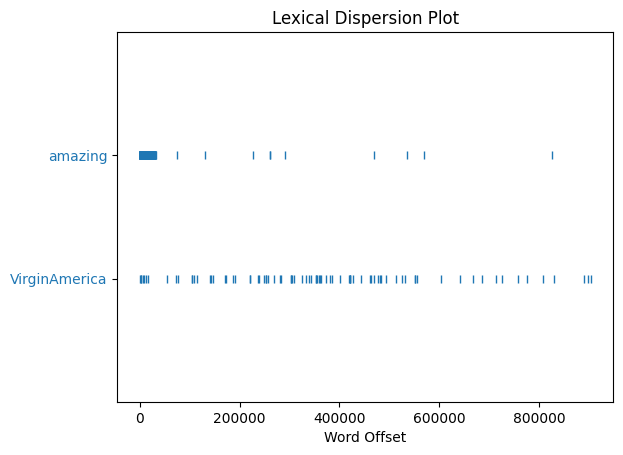

In [39]:
text.dispersion_plot(["VirginAmerica", "amazing"])

In [40]:
# Generate common co-occuring words within a given text
text.collocations()

Customer Service; Service Issue; Eastern Time; .,, 2015; Late Flight;
Central Time; http ://; Pacific Time; Lost Luggage; Booking Problems;
",, 2015; ?,, 2015; New York; ]", 2015; ,,, Delta; Attendant
Complaints; !,, 2015; Cancelled Flight; Virgin America; .",, 2015


#### n-gram Analysis
Examining sequences of 'n' contiguous words or characters in a text document
- Unigrams (1-grams): Single words, e.g., "apple," "banana."
- Bigrams (2-grams): Pairs of consecutive words, e.g., "machine learning," "natural 
language."
- Trigrams (3-grams): Triplets of consecutive words, e.g., "deep learning algorithms," 
"data science projects."
- n-grams (higher 'n'): Sequences of 'n' consecutive words or characters.

In [41]:
from nltk.util import ngrams
bigrams_contiguous_words = ngrams(text.tokens, 2)   # Creates pair of two words contiguously
trigrams_contiguous_words = ngrams(text.tokens, 3)  # Creates trigram of three words 

In [42]:
# Let's try to get some word pairs that are 'Adjectives' followed by a 'Noun'
# ('Adjective', 'Noun') as touples;  
# Adjective starts with J and Noun starts with N
from nltk import pos_tag
count = 0
for contiguous_words in bigrams_contiguous_words:
    if (pos_tag([contiguous_words[0]])[0][1][0] == 'J' and pos_tag([contiguous_words[1]])[0][1][0] == 'N'):
        print(pos_tag(contiguous_words))
        count += 1
    #print(contiguous_words)
    #print(pos_tag([contiguous_words[0]]))
    #count += 1
    if count == 10:
       break

[('Central', 'JJ'), ('Time', 'NNP')]
[('obnoxious', 'JJ'), ('""', 'NN')]
[('little', 'JJ'), ('recourse', 'NN')]
[('bad', 'JJ'), ('thing', 'NN')]
[('bad', 'JJ'), ('thing', 'NN')]
[('great', 'JJ'), ('deal', 'NN')]
[('Seductive', 'JJ'), ('skies', 'NNS')]
[('great', 'JJ'), ('things', 'NNS')]
[('last', 'JJ'), ('week', 'NN')]
[('large', 'JJ'), ('gentleman', 'NN')]


In [43]:
# Let's try to extract some common phrases of length 3
# ('Determiner', 'Adjective', 'Noun')
count = 0
for contiguous_words in trigrams_contiguous_words:
    if (pos_tag([contiguous_words[0]])[0][1][0] == 'D' and pos_tag([contiguous_words[1]])[0][1][0] == 'J' and pos_tag([contiguous_words[2]])[0][1][0] == 'N'):
        print(contiguous_words)
        count += 1
    if count == 10:
       break

('a', 'great', 'deal')
('a', 'red', 'eye')
('a', 'hard', 'time')
('an', 'unused', 'ticket')
('a', 'new', 'city')
('a', 'good', 'reason')
('a', 'great', 'ride')
('a', 'new', 'plane')
('the', 'best', 'student')
('a', 'different', 'rate')


In [44]:
# Out of all the bigrams, let's try to find the most frequent ones
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import *
finder = BigramCollocationFinder.from_words(text.tokens)
count = 0
for k,v in finder.ngram_fd.items():
  count += 1
  if count == 10:
    break
  print(k,v)

('tweet_id', ',') 1
(',', 'airline_sentiment') 1
('airline_sentiment', ',') 1
(',', 'airline_sentiment_confidence') 1
('airline_sentiment_confidence', ',') 1
(',', 'negativereason') 1
('negativereason', ',') 1
(',', 'negativereason_confidence') 1
('negativereason_confidence', ',') 1


In [45]:
finder.apply_freq_filter(10) #Apply a filter with frequency 10
count = 0
for k,v in finder.ngram_fd.items():
  count += 1
  if count == 10:
    break
  print(k,v)

('airline', ',') 12
(',', 'neutral') 3102
('neutral', ',') 3102
(',', '1') 13902
('1', '.') 13936
('.', '0') 15560
('0', ',,,') 3063
(',,,', 'Virgin') 271
('Virgin', 'America') 509


#### Using PMI (Pointwise Mutual Information) for filtering

There are many probability measures such as likelihood ratio or PMI that compute probability of a word relative to other words in a corpus.

PMI measures the association of two words by calculating

$log \frac{p(x, y)}{(p(x) \space p(y)} = log \frac{p(x|y) p(y)}{(p(x) \space p(y)} = log \frac{p(x|y)}{p(x)}$

Let's say you have 100 words in the corpus, and if frequency of a certain word x is 1 and it only occurs with another word y only once.
And the frequency of this word is 10.

p(x|y) = $\frac{p(x, y)} {p(y)} = \frac{\frac{1}{100}}{\frac{1}{10}} = \frac{10}{100} = 0.1$

p(x) = $1/100 = 0.01$

PMI = $log \frac{0.1} {0.01} = log(10) = 1$

* PMI value of zero indicates no association.
* A positive PMI indicates that two words are more likely to cooccur
* A negative PMI indicates that two words are less likely to cooccur

In [46]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder.nbest(bigram_measures.pmi, 5) #5 most common bigrams with Pointwise_Mutual_Inormation (PMI)

[('Hong', 'Kong'),
 ('Fingers', 'crossed'),
 ('Buenos', 'Aires'),
 ('Grand', 'Rapids'),
 ('College', 'Station')]

In [47]:
# Similarly, we can find the most useful Trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder = TrigramCollocationFinder.from_words(text.tokens)
finder.apply_freq_filter(3)
finder.nbest(trigram_measures.pmi, 5)

[('Ando', 'por', 'el'),
 ('por', 'el', 'mundo'),
 ('3d', 'embossed', 'badges'),
 ('5sos', 'af', ':))),'),
 (',☀️', 'SoFla', '☀️,')]

In [48]:
# For Quadgrams
from nltk.collocations import QuadgramCollocationFinder
from nltk.collocations import *
quadgram_measures = nltk.collocations.QuadgramAssocMeasures()

finder = QuadgramCollocationFinder.from_words(text.tokens)
finder.apply_freq_filter(4)
finder.nbest(quadgram_measures.pmi, 5)

[('Saint', 'Maur', 'des', 'Fossés'),
 ('im', '5sos', 'af', ':))),'),
 ('top', 'secret', 'gaming', 'facility'),
 ('Alphen', 'aan', 'den', 'Rijn'),
 ('Thinking', 'About', 'Summer', 'With')]

#### Frequency Distribution

In [49]:
from nltk import FreqDist
FreqDist(text.tokens)

FreqDist({',': 78422, '-': 46681, '0': 41078, ',,': 39721, '.': 39300, ':': 30297, '02': 15323, '1': 14889, '2015': 14680, '0800': 14640, ...})

In [50]:
FreqDist(text.tokens).most_common(10)

[(',', 78422),
 ('-', 46681),
 ('0', 41078),
 (',,', 39721),
 ('.', 39300),
 (':', 30297),
 ('02', 15323),
 ('1', 14889),
 ('2015', 14680),
 ('0800', 14640)]

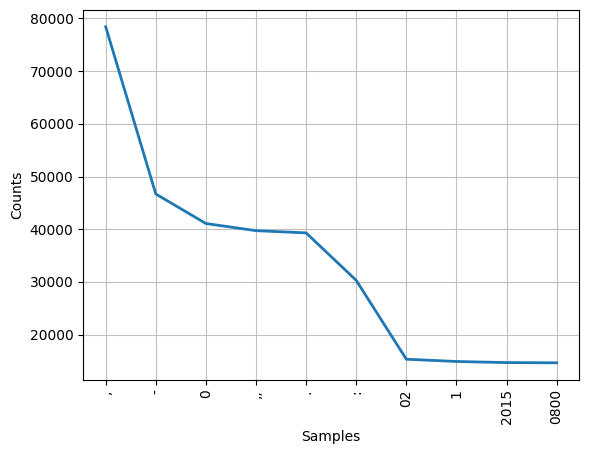

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
# Histogram of the most frequent words
FreqDist.plot(FreqDist(text.tokens), 10) # 10 is the number of samples on the x-axis + 1

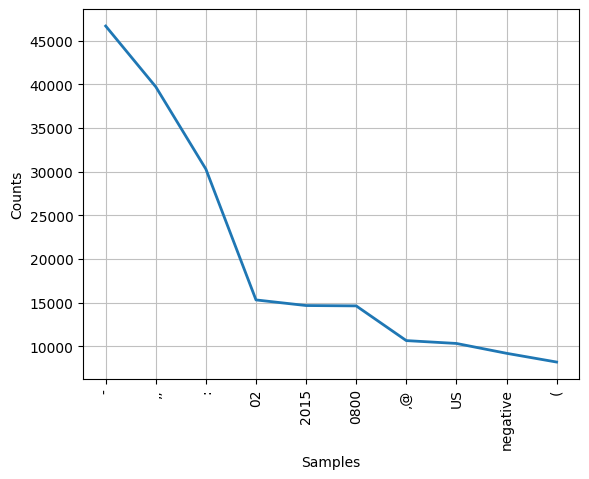

<Axes: xlabel='Samples', ylabel='Counts'>

In [52]:
# Before generatng it, remove the stopwords
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
sw_list.extend(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s",'0','1',"' "]) # Add few more to the set
tokens_after_sw = []
for each in text.tokens:
    if each.lower() not in sw_list:
        tokens_after_sw.append(each)
FreqDist(tokens_after_sw).plot(10)

#### Word Cloud

In [53]:
#Let's make a wordcloud
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw)) # DataType
print(len(raw))  # No. of words in the file
print(raw[:75])  # Printing the first few words

<class 'str'>
1176812
﻿The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky


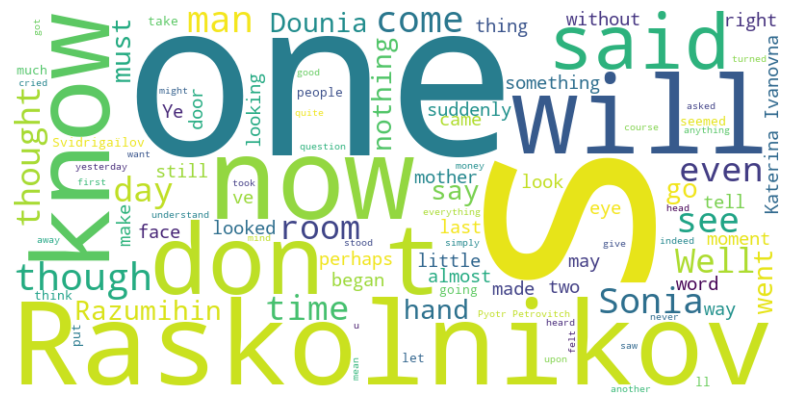

In [54]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(raw)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Named Entity Recognition (NER)

(S
  (NE Adam/NNP)
  works/VBZ
  at/IN
  (NE TJX/NNP Companies/NNPS)
  in/IN
  (NE Boston/NNP)
  ,/,
  MA/NNP)


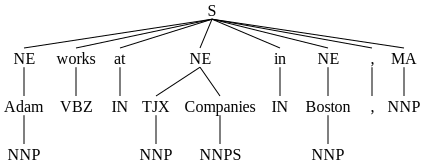

In [55]:
from nltk import word_tokenize, ne_chunk
from matplotlib import pyplot as plt

#Install tkinter first --> sudo apt-get install python3.7-tk
from nltk.draw.tree import draw_trees

# Input text
text = "Adam works at TJX Companies in Boston, MA"

# Tokenize and POS tag the text
tokens = word_tokenize(text)
tags = pos_tag(tokens)

# Perform named entity recognition
entities = ne_chunk(tags,binary=True) # binary=True, named entities will be tagged as NE, or else the classfier will label such as PERSON, ORGANIZATION

print(entities)
entities

- NNP --> Proper noun, singular
- NNS --> Noun, plural
- IN	--> Preposition or subordinating conjunction

In [56]:
# Print all NE entities
for j in str(entities).split('\n'):
    if len(j.split('NE')) == 2:
        print(j.split('NE')[1].split('/')[0].lstrip())

Adam
TJX
Boston
